In [77]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [79]:
#Carga de dataset
data = pd.read_csv('/content/houses_medellin.csv')

In [80]:
print(data)

     Unnamed: 0  Habitaciones  Baños  Estrato      Antigüedad Piso N°  \
0             0           NaN    NaN      NaN             NaN     NaN   
1             1           1.0    2.0      4.0      1 a 8 años       3   
2             2           1.0    2.0      6.0     9 a 15 años     NaN   
3             3           NaN    NaN      NaN             NaN     NaN   
4             4           1.0    1.0      5.0             NaN       3   
..          ...           ...    ...      ...             ...     ...   
425         425           3.0    1.0      3.0      1 a 8 años      16   
426         426           3.0    3.0      4.0     9 a 15 años       5   
427         427           2.0    1.0      4.0     9 a 15 años      15   
428         428           3.0    2.0      4.0    16 a 30 años       3   
429         429           3.0    3.0      5.0  más de 30 años       3   

    Administración          Precio m²  Parqueaderos     Estado  \
0              NaN                NaN           NaN      

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            430 non-null    int64  
 1   Habitaciones          272 non-null    float64
 2   Baños                 271 non-null    float64
 3   Estrato               309 non-null    float64
 4   Antigüedad            217 non-null    object 
 5   Piso N°               214 non-null    object 
 6   Administración        274 non-null    object 
 7   Precio m²             274 non-null    object 
 8   Parqueaderos          212 non-null    float64
 9   Estado                185 non-null    object 
 10  Tipo de apartamento   19 non-null     object 
 11  Precio                430 non-null    int64  
 12  Área construída (m²)  274 non-null    object 
 13  Área privada (m²)     274 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 47.2+ KB


In [82]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [83]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [84]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [85]:
#resultado
print(data)

     Unnamed: 0  Habitaciones  Baños  Estrato  Antigüedad  Piso N°  \
0             0           NaN    NaN      NaN           5       17   
1             1           1.0    2.0      4.0           0        9   
2             2           1.0    2.0      6.0           2       17   
3             3           NaN    NaN      NaN           5       17   
4             4           1.0    1.0      5.0           5        9   
..          ...           ...    ...      ...         ...      ...   
425         425           3.0    1.0      3.0           0        7   
426         426           3.0    3.0      4.0           2       11   
427         427           2.0    1.0      4.0           2        6   
428         428           3.0    2.0      4.0           1        9   
429         429           3.0    3.0      5.0           4        9   

     Administración  Precio m²  Parqueaderos  Estado  Tipo de apartamento  \
0               129        189           NaN       5                    3   
1    

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            430 non-null    int64  
 1   Habitaciones          272 non-null    float64
 2   Baños                 271 non-null    float64
 3   Estrato               309 non-null    float64
 4   Antigüedad            430 non-null    int64  
 5   Piso N°               430 non-null    int64  
 6   Administración        430 non-null    int64  
 7   Precio m²             430 non-null    int64  
 8   Parqueaderos          212 non-null    float64
 9   Estado                430 non-null    int64  
 10  Tipo de apartamento   430 non-null    int64  
 11  Precio                430 non-null    int64  
 12  Área construída (m²)  430 non-null    int64  
 13  Área privada (m²)     430 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 47.2 KB


In [87]:
#llenar datos vacios
columnas_especificas = ['Habitaciones', 'Baños','Estrato','Parqueaderos']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            430 non-null    int64  
 1   Habitaciones          430 non-null    float64
 2   Baños                 430 non-null    float64
 3   Estrato               430 non-null    float64
 4   Antigüedad            430 non-null    int64  
 5   Piso N°               430 non-null    int64  
 6   Administración        430 non-null    int64  
 7   Precio m²             430 non-null    int64  
 8   Parqueaderos          430 non-null    float64
 9   Estado                430 non-null    int64  
 10  Tipo de apartamento   430 non-null    int64  
 11  Precio                430 non-null    int64  
 12  Área construída (m²)  430 non-null    int64  
 13  Área privada (m²)     430 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 47.2 KB


In [89]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [90]:
print(X)
print('*'*25)
print(y)

     Unnamed: 0  Habitaciones     Baños   Estrato  Antigüedad  Piso N°  \
0             0      2.665441  2.383764  4.789644           5       17   
1             1      1.000000  2.000000  4.000000           0        9   
2             2      1.000000  2.000000  6.000000           2       17   
3             3      2.665441  2.383764  4.789644           5       17   
4             4      1.000000  1.000000  5.000000           5        9   
..          ...           ...       ...       ...         ...      ...   
425         425      3.000000  1.000000  3.000000           0        7   
426         426      3.000000  3.000000  4.000000           2       11   
427         427      2.000000  1.000000  4.000000           2        6   
428         428      3.000000  2.000000  4.000000           1        9   
429         429      3.000000  3.000000  5.000000           4        9   

     Administración  Precio m²  Parqueaderos  Estado  Tipo de apartamento  
0               129        189     

In [91]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [92]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Unnamed: 0  Habitaciones     Baños   Estrato  Antigüedad  Piso N°  \
0             0      2.665441  2.383764  4.789644           5       17   
1             1      1.000000  2.000000  4.000000           0        9   
2             2      1.000000  2.000000  6.000000           2       17   
3             3      2.665441  2.383764  4.789644           5       17   
4             4      1.000000  1.000000  5.000000           5        9   
..          ...           ...       ...       ...         ...      ...   
425         425      3.000000  1.000000  3.000000           0        7   
426         426      3.000000  3.000000  4.000000           2       11   
427         427      2.000000  1.000000  4.000000           2        6   
428         428      3.000000  2.000000  4.000000           1        9   
429         429      3.000000  3.000000  5.000000           4        9   

     Administración  Precio m²  Parqueaderos  Estado  Tipo de apartamento  
0               129        189     

In [93]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [94]:
print(X)

[[ 1.00000000e+00 -1.72802746e+00  4.06756170e-16 ...  0.00000000e+00
   7.81552894e-01  2.02656663e-01]
 [ 1.00000000e+00 -1.71997138e+00 -1.52543331e+00 ...  0.00000000e+00
   7.81552894e-01  2.02656663e-01]
 [ 1.00000000e+00 -1.71191531e+00 -1.52543331e+00 ...  1.14437235e+00
   7.81552894e-01  2.02656663e-01]
 ...
 [ 1.00000000e+00  1.71191531e+00 -6.09499844e-01 ...  0.00000000e+00
  -9.38930439e-01  2.02656663e-01]
 [ 1.00000000e+00  1.71997138e+00  3.06433623e-01 ... -9.65253198e-01
  -9.38930439e-01  2.02656663e-01]
 [ 1.00000000e+00  1.72802746e+00  3.06433623e-01 ... -9.65253198e-01
  -2.08591933e+00  2.02656663e-01]]


In [95]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [96]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 3.99003319e+09  3.29344450e+08 -5.41702074e+09  2.23912046e+10
 -6.03523145e+09  2.26096736e+09 -5.77213199e+09 -2.99776880e+09
  4.69546541e+09 -1.22193386e+10  3.27314578e+09  4.01599769e+09]
El valor predecido es (usando el descenso por el gradiente): 3321791522.3824


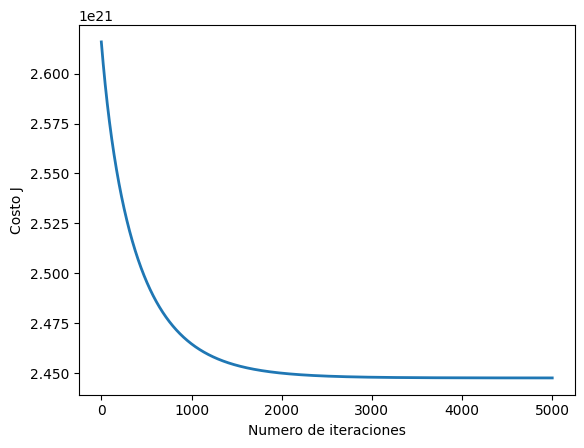

In [97]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de inmuebles Medellin con distintas caracteristicas
X_array = [1, 1, 3, 3, 5, 5, 16, 80, 160, 2, 2, 3]
X_array[1:12] = (X_array[1:12] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [98]:
X_array = [1, 1, 3, 3, 5, 5, 16, 80, 160, 2, 2, 3]
X_array[1:12] = (X_array[1:12] - mu) / sigma

In [99]:
X_array[1:12]

[-1.719971383258929,
 0.30643362344149283,
 0.7352148457829893,
 0.24110059505716427,
 0.9151324589830793,
 0.49034606099133504,
 -0.4014519097239725,
 0.5008212350573323,
 1.1443723479415695,
 -0.9389304388449189,
 0.20265666290094472]

In [100]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [101]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de los inmuebles Medellin con tres habitaciones

X_array = [1, 1, 3, 3, 5, 5, 16, 80, 160, 2, 2, 3]
price = np.dot(X_array, theta)

print('Precio predecido de los inmuebles Medellin con tres habitaciones  (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 3.99003438e+09  3.38049342e+08 -5.48786791e+09  2.25520072e+10
 -6.12649506e+09  2.21378383e+09 -5.76352976e+09 -3.02189098e+09
  4.73787088e+09 -1.22911683e+10  3.28763776e+09  4.05302667e+09]
Precio predecido de los inmuebles Medellin con tres habitaciones  (usando la ecuación de la normal): $454200551095
